In [2]:
import pandas as pd
pd.options.display.float_format = '{:,.4f}'.format
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sns
import time
import plotly.express as px

In [4]:
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

import torch
print("CUDA available:", torch.cuda.is_available())

print("GPU in use:", torch.cuda.current_device())
torch.cuda.empty_cache()

Num GPUs Available:  4
CUDA available: True
GPU in use: 0


# Reading Data + EDA

In [3]:
inflows = pd.read_parquet('../data/ucsd-inflows.pqt')
inflows.category = inflows.category.apply(lambda x: 'PAYCHECK' if x == 'PAYCHECK_PLACEHOLDER' else x)

In [25]:
inflows.head()

,prism_consumer_id,prism_account_id,memo,amount,posted_date,category
0,0,acc_0,PAYCHECK,"2,477.0200",2022-03-18,PAYCHECK
1,0,acc_0,EXTERNAL_TRANSFER,100.0000,2022-10-25,EXTERNAL_TRANSFER
2,0,acc_0,MISCELLANEOUS,6.2900,2022-08-26,MISCELLANEOUS
3,0,acc_0,EXTERNAL_TRANSFER,277.0000,2022-06-03,EXTERNAL_TRANSFER
4,0,acc_0,EXTERNAL_TRANSFER,100.0000,2022-07-29,EXTERNAL_TRANSFER


In [37]:
# Check values add up

# inflows['category_check'] = inflows.category.apply(lambda x: 'PAYCHECK' if x == 'PAYCHECK_PLACEHOLDER' else x)
# inflows.category.value_counts().loc[['PAYCHECK', 'PAYCHECK_PLACEHOLDER']].sum() == inflows.category_check.value_counts().loc[['PAYCHECK']].values[0]

#### Transactions Per Consumer

In [51]:
inflows_consumer_cnt = inflows.groupby('prism_consumer_id').count()[['category']]
inflows_consumer_cnt.head()

,category
prism_consumer_id,
0,91
2,113
4,152
7,129
9,375


In [53]:
print(f'Average # of transactions per consumer: {inflows_consumer_cnt.category.mean():.4f}')

Average # of transactions per consumer: 172.5336


#### Sum of Inflows by Consumer

In [56]:
inflows_consumer_sum = inflows.groupby('prism_consumer_id')[['amount']].sum()

inflows_consumer_sum.head()

,amount
prism_consumer_id,
0,"110,312.4300"
2,"349,639.0300"
4,"462,557.9000"
7,"250,214.0900"
9,"215,342.0100"


In [58]:
print(f'Average inflow sum per consumer: ${inflows_consumer_sum.amount.mean():.4f}')

Average inflow sum per consumer: $126760.4207


#### Income Estimates

In [59]:
inflows.category.value_counts()

category
EXTERNAL_TRANSFER        156533
SELF_TRANSFER            110437
DEPOSIT                   61345
PAYCHECK                  59225
MISCELLANEOUS             55648
REFUND                    23220
INVESTMENT_INCOME         17325
SMALL_DOLLAR_ADVANCE      13621
OTHER_BENEFITS             7708
TAX                        3405
LOAN                       2513
UNEMPLOYMENT_BENEFITS      1961
INSURANCE                   174
Name: count, dtype: int64

In [5]:
# relevant income categories
income_cats = ['EXTERNAL_TRANSFER', 'DEPOSIT', 'PAYCHECK', 'INVESTMENT_INCOME', 'OTHER_BENEFITS', 'UNEMPLOYMENT_BENEFITS']
inflows_rel = inflows[inflows.category.isin(income_cats)]

In [63]:
print(f'Originally {inflows.shape[0]} records, Now {inflows_rel.shape[0]} records')

Originally 513115 records, Now 304097 records


In [66]:
inflows_rel_consumer_sum = inflows_rel.groupby('prism_consumer_id')[['amount']].sum()

print(f'Average rough income sum per consumer: ${inflows_rel_consumer_sum.amount.mean():.4f}')

Average rough income sum per consumer: $87154.2950


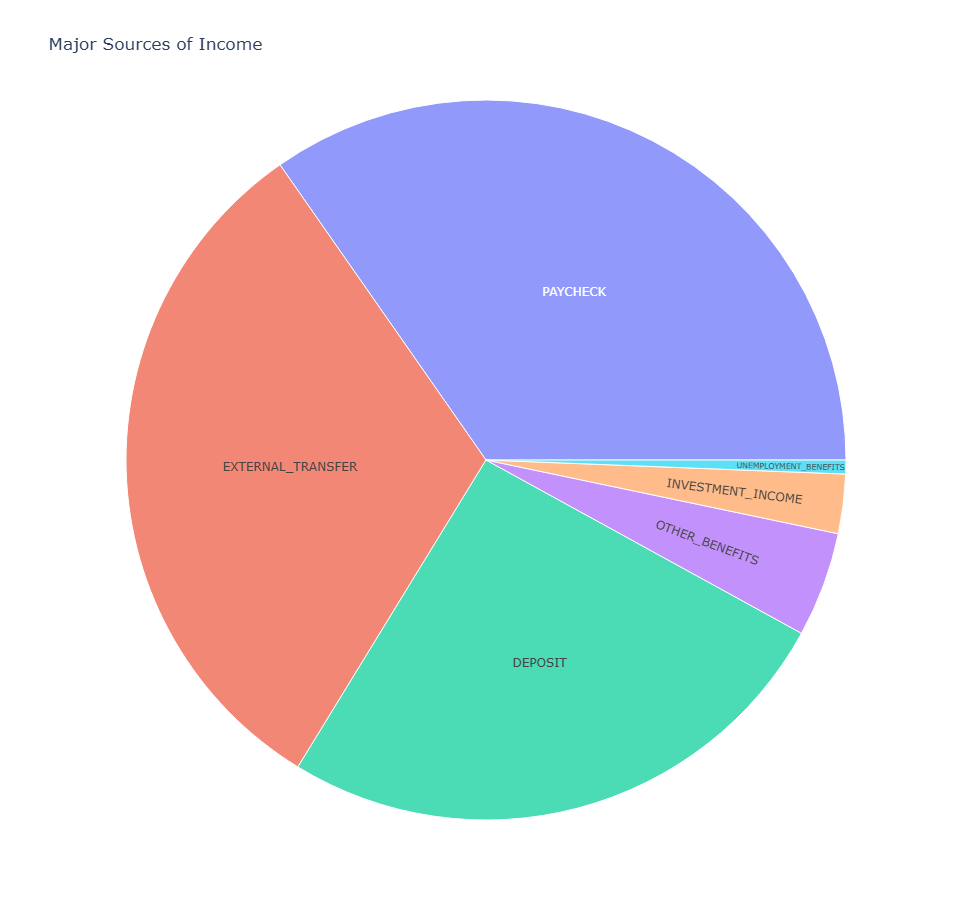

In [10]:
sunburst_income = px.sunburst(
    inflows_rel,
    path=["category"], 
    values="amount",
    title="Major Sources of Income",
    width=900, height=900
)

sunburst_income.write_html('../result/sunburst_income_sources.html')
fig.show()
